# Project 18 Doctors Consultation Fees Prediction
-->Aim is to predict the Doctors Fees based on given data.

## Lets Load the important libraries

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets Load the dataset

In [189]:
dt=pd.read_excel('Doctors_Test.xlsx')
dt.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [190]:
dte=pd.read_excel('Doctors_Train.xlsx')
dte.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [191]:
dt['DATA']='Test'
dte['DATA']='Train'
dt['Fees']=0

In [192]:
data=pd.concat([dte,dt])
data.head()

,DATA,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,Train,24 years experience,100,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,Train,12 years experience,350,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,Train,9 years experience,300,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,Train,12 years experience,250,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,Train,20 years experience,250,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
DATA                  7948 non-null object
Experience            7948 non-null object
Fees                  7948 non-null int64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
dtypes: int64(1), object(7)
memory usage: 558.8+ KB


## Checking and Treating Missing Values 

In [194]:
## Checiking Null values
data.isnull().sum()

DATA                     0
Experience               0
Fees                     0
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
dtype: int64

In [195]:
data['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%', '52%'],
      dtype=object)

In [196]:
data['Rating']=data['Rating'].str.split('%').str[0]

In [197]:
data['Rating'].fillna('0',inplace=True)

In [198]:
data['Rating']=data['Rating'].astype(int)

In [199]:
data['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [200]:
data["Place"].fillna("Unknown,Unknown",inplace=True)
data["Place"] = data["Place"].str.split(",")
data["City"] = data["Place"].str[-1]
data["Place"] = data["Place"].str[0]

In [201]:
data.isnull().sum()

DATA                     0
Experience               0
Fees                     0
Miscellaneous_Info    3454
Place                    0
Profile                  0
Qualification            0
Rating                   0
City                     0
dtype: int64

In [202]:
data['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       'General Dentistry Dental Fillings RCT - Single Sitting',
       '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment'],
      dtype=object)

In [203]:
data.drop(['Miscellaneous_Info'],axis=1,inplace =True)

In [204]:
data.isnull().sum()

DATA             0
Experience       0
Fees             0
Place            0
Profile          0
Qualification    0
Rating           0
City             0
dtype: int64

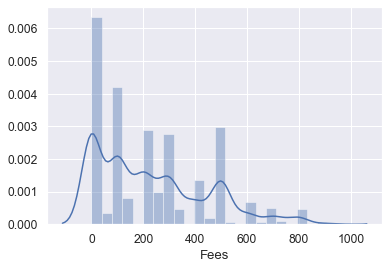

In [205]:
sns.set(style="darkgrid", palette='deep', font_scale=1.1)
sns.distplot(data['Fees'])

## Lets do the EDA

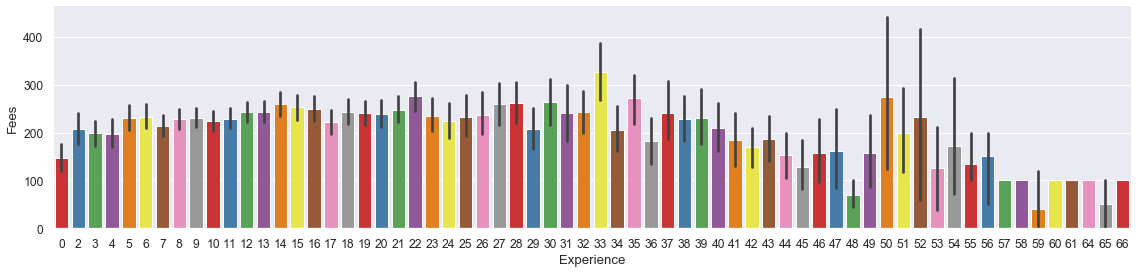

In [187]:
sns.catplot(x='Experience',y='Fees',data=data,kind='bar',palette='Set1',aspect=4,height=4)

From the above we can see that most of doctors with 2 to 39 years of experience has fees more than 200, and doctors with 33 years of expriance have fees more than 300, and after 53 years of exprience we can see that the fees has been dropped.

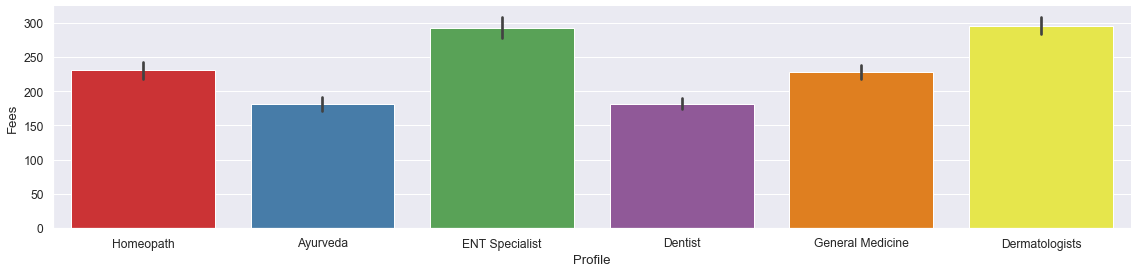

In [117]:
sns.catplot(x='Profile',y='Fees',data=data,kind='bar',palette='Set1',aspect=4,height=4)

From the above we can see that the doctors who are ENT Specialist and Dermatologist have higer fees compared to other profiles.

In [206]:
data['Experience']=data['Experience'].str.split(' ').str[0].astype(int)

In [207]:
data['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
DATA             7948 non-null object
Experience       7948 non-null int32
Fees             7948 non-null int64
Place            7948 non-null object
Profile          7948 non-null object
Qualification    7948 non-null object
Rating           7948 non-null int32
City             7948 non-null object
dtypes: int32(2), int64(1), object(5)
memory usage: 496.8+ KB


In [209]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['City']=le.fit_transform(data['City'])
data['Place']=le.fit_transform(data['Place'])
data['Profile']=le.fit_transform(data['Profile'])
data['Qualification']=le.fit_transform(data['Qualification'])

In [210]:
#data['Qualification_2'].unique()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
DATA             7948 non-null object
Experience       7948 non-null int32
Fees             7948 non-null int64
Place            7948 non-null int32
Profile          7948 non-null int32
Qualification    7948 non-null int32
Rating           7948 non-null int32
City             7948 non-null int32
dtypes: int32(6), int64(1), object(1)
memory usage: 372.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B5C458E88>,
      dtype=object)

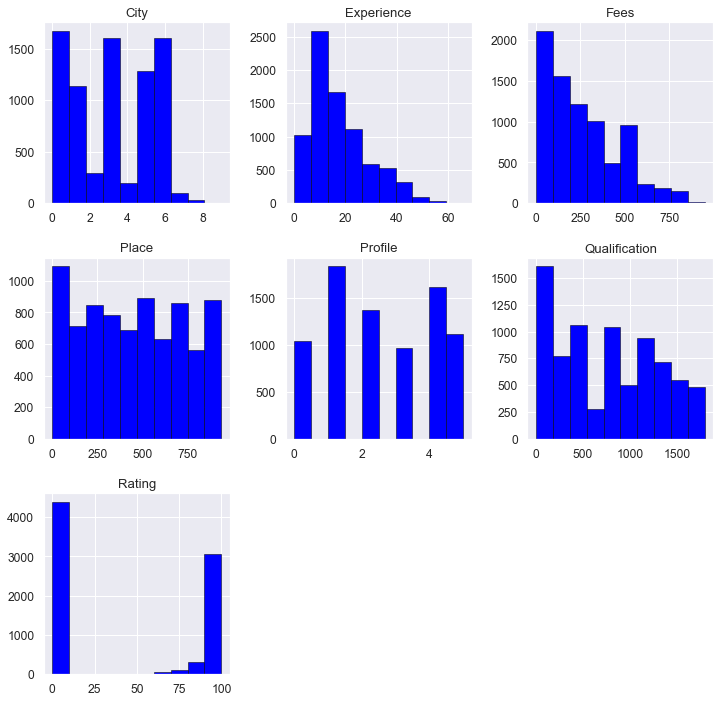

In [211]:
sns.set(style="darkgrid", palette='deep', font_scale=1.1)
data.hist(figsize=(12,12),color='blue',edgecolor='black',linewidth=0.5)

From the above we can see that most of the doctors are with experince with 10 years in our dataset, and most of data are evenly distributed.

## Lets Split and Scale the data

In [212]:
## After doing feature engineering in full dataset and now we can split the data into our orignal test and train dataset
Trainfinal=data.loc[data['DATA']=='Train']
Testfinal=data.loc[data['DATA']=='Test']

In [213]:
Trainfinal.drop(['DATA'],axis=1,inplace=True)
Testfinal.drop(['DATA'],axis=1,inplace=True)

In [238]:
x=Trainfinal.iloc[:,:-1]
x.head()

,Experience,Fees,Place,Profile,Qualification,Rating
0,24,100,324,5,491,100
1,12,350,926,0,92,98
2,9,300,494,3,1442,0
3,12,250,74,0,572,0
4,20,250,367,0,16,100


In [240]:
xt=Testfinal.drop(['Fees'],axis=1)
xt.head()

,Experience,Place,Profile,Qualification,Rating,City
0,35,217,4,749,0,6
1,31,924,3,983,0,5
2,40,314,2,789,70,1
3,0,573,0,16,0,3
4,16,340,1,255,100,0


In [216]:
y=Trainfinal["Fees"]
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [241]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x,xt)

In [218]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [219]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4172, 6), (1789, 6), (4172,), (1789,))

# Lets Implement ML Algorithm.

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [221]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=97)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)

In [222]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [229]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  1.0
Mean_Squared_Error = 3.154910246847739e-26
Mean_Absolute_Error = 1.397890560526131e-13
Root_Mean_Squared_Error = 1.7762067016109749e-13
Cross_Val_Score =  1.0


------------------------------------- Lasso -------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.9999725558798466
Mean_Squared_Error = 0.9995367758099407
Mean_Absolute_Error = 0.8246326744005524
Root_Mean_Squared_Error = 0.999768361076675
Cross_Val_Score =  0.9999725299143606


------------------------------------- Ridge -------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solv

In [230]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,1.000000,3.154910e-26,1.397891e-13,1.776207e-13,1.000000
1,Lasso,0.999973,9.995368e-01,8.246327e-01,9.997684e-01,0.999973
2,Ridge,1.000000,2.378095e-03,3.987260e-02,4.876571e-02,1.000000
3,DecisionTreeRegressor,0.999951,1.802683e+00,9.223030e-02,1.342640e+00,0.999946
4,AdaBoostRegressor,0.997510,9.068980e+01,7.154338e+00,9.523119e+00,0.994253
5,RandomForestRegressor,0.999950,1.822247e+00,1.006149e-01,1.349906e+00,0.999953
6,GradientBoostingRegressor,0.999951,1.802660e+00,9.934578e-02,1.342632e+00,0.999974


From the above we can see that almost all the models are working as best giving us score more than 90, but we can see that Linear Regression and Ridge are working as best, but we choose Ridge as our final model as MSE is low and Crossval score is high.

In [231]:
from sklearn.externals import joblib
joblib.dump(RI,'Doctors_Consultation_Fees_Prediction.obj')

['Doctors_Consultation_Fees_Prediction.obj']

In [232]:
model=joblib.load('Doctors_Consultation_Fees_Prediction.obj')

In [233]:
model.predict(x_test)

array([299.99139543, 300.01257473, 499.9359769 , ..., 200.03785591,
       499.95438767, 200.01956819])

In [243]:
Predictions=model.predict(xt)

In [244]:
pre = pd.DataFrame(Predictions)
pre.columns = ["prediction"]
pre.to_csv("Doctors_Consultation_Fees_Prediction_results.csv")